In [249]:
# importing libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from datetime import datetime as dt

pd.set_option('display.max_rows',None)

In [239]:
# reading data files
florida = pd.read_csv('florida_deaths_covid.csv')
florida = pd.DataFrame(florida)
florida.head()

,Geography,Date,Weekly Deaths,Death Data As Of
0,Florida,Apr 12 2025,11,Apr 17 2025
1,Florida,Apr 5 2025,16,Apr 17 2025
2,Florida,Mar 29 2025,27,Apr 17 2025
3,Florida,Mar 22 2025,21,Apr 17 2025
4,Florida,Mar 15 2025,15,Apr 17 2025


In [240]:
# dropping death data as of column
florida = florida.drop(columns=['Death Data As Of'])
florida.head()

,Geography,Date,Weekly Deaths
0,Florida,Apr 12 2025,11
1,Florida,Apr 5 2025,16
2,Florida,Mar 29 2025,27
3,Florida,Mar 22 2025,21
4,Florida,Mar 15 2025,15


In [241]:
# converting Date to datetime and sorting dataframe by earliest dates first
florida['Date'] = pd.to_datetime(florida['Date'])
florida = florida.sort_values(by='Date').reset_index(drop=True)
florida.head()

,Geography,Date,Weekly Deaths
0,Florida,2020-01-11,0
1,Florida,2020-01-18,0
2,Florida,2020-01-25,0
3,Florida,2020-02-01,0
4,Florida,2020-02-08,0


In [242]:
# checking if other states were included as a mistake
print(florida[florida['Geography'] != 'Florida'])

Empty DataFrame
Columns: [Geography, Date, Weekly Deaths]
Index: []


In [243]:
# replacing "Counts 1-9" with 9
florida['Weekly Deaths'].replace(to_replace='Counts 1-9', value=9,inplace = True)
florida['Weekly Deaths'] = florida['Weekly Deaths'].astype(int)
florida

/var/folders/6v/ftpn66z95v9btj93m5dqmvqm0000gn/T/ipykernel_40130/1485119125.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  florida['Weekly Deaths'].replace(to_replace='Counts 1-9', value=9,inplace = True)


,Geography,Date,Weekly Deaths
0,Florida,2020-01-11,0
1,Florida,2020-01-18,0
2,Florida,2020-01-25,0
3,Florida,2020-02-01,0
4,Florida,2020-02-08,0
5,Florida,2020-02-15,0
6,Florida,2020-02-22,0
7,Florida,2020-02-29,0
8,Florida,2020-03-07,9
9,Florida,2020-03-14,9


In [244]:
# removing geography, changing weekly deaths to weekly FL deaths
florida = florida.drop(columns=['Geography'])
florida = florida.rename(columns={'Weekly Deaths':'Weekly FL Deaths'})
florida.head()

,Date,Weekly FL Deaths
0,2020-01-11,0
1,2020-01-18,0
2,2020-01-25,0
3,2020-02-01,0
4,2020-02-08,0


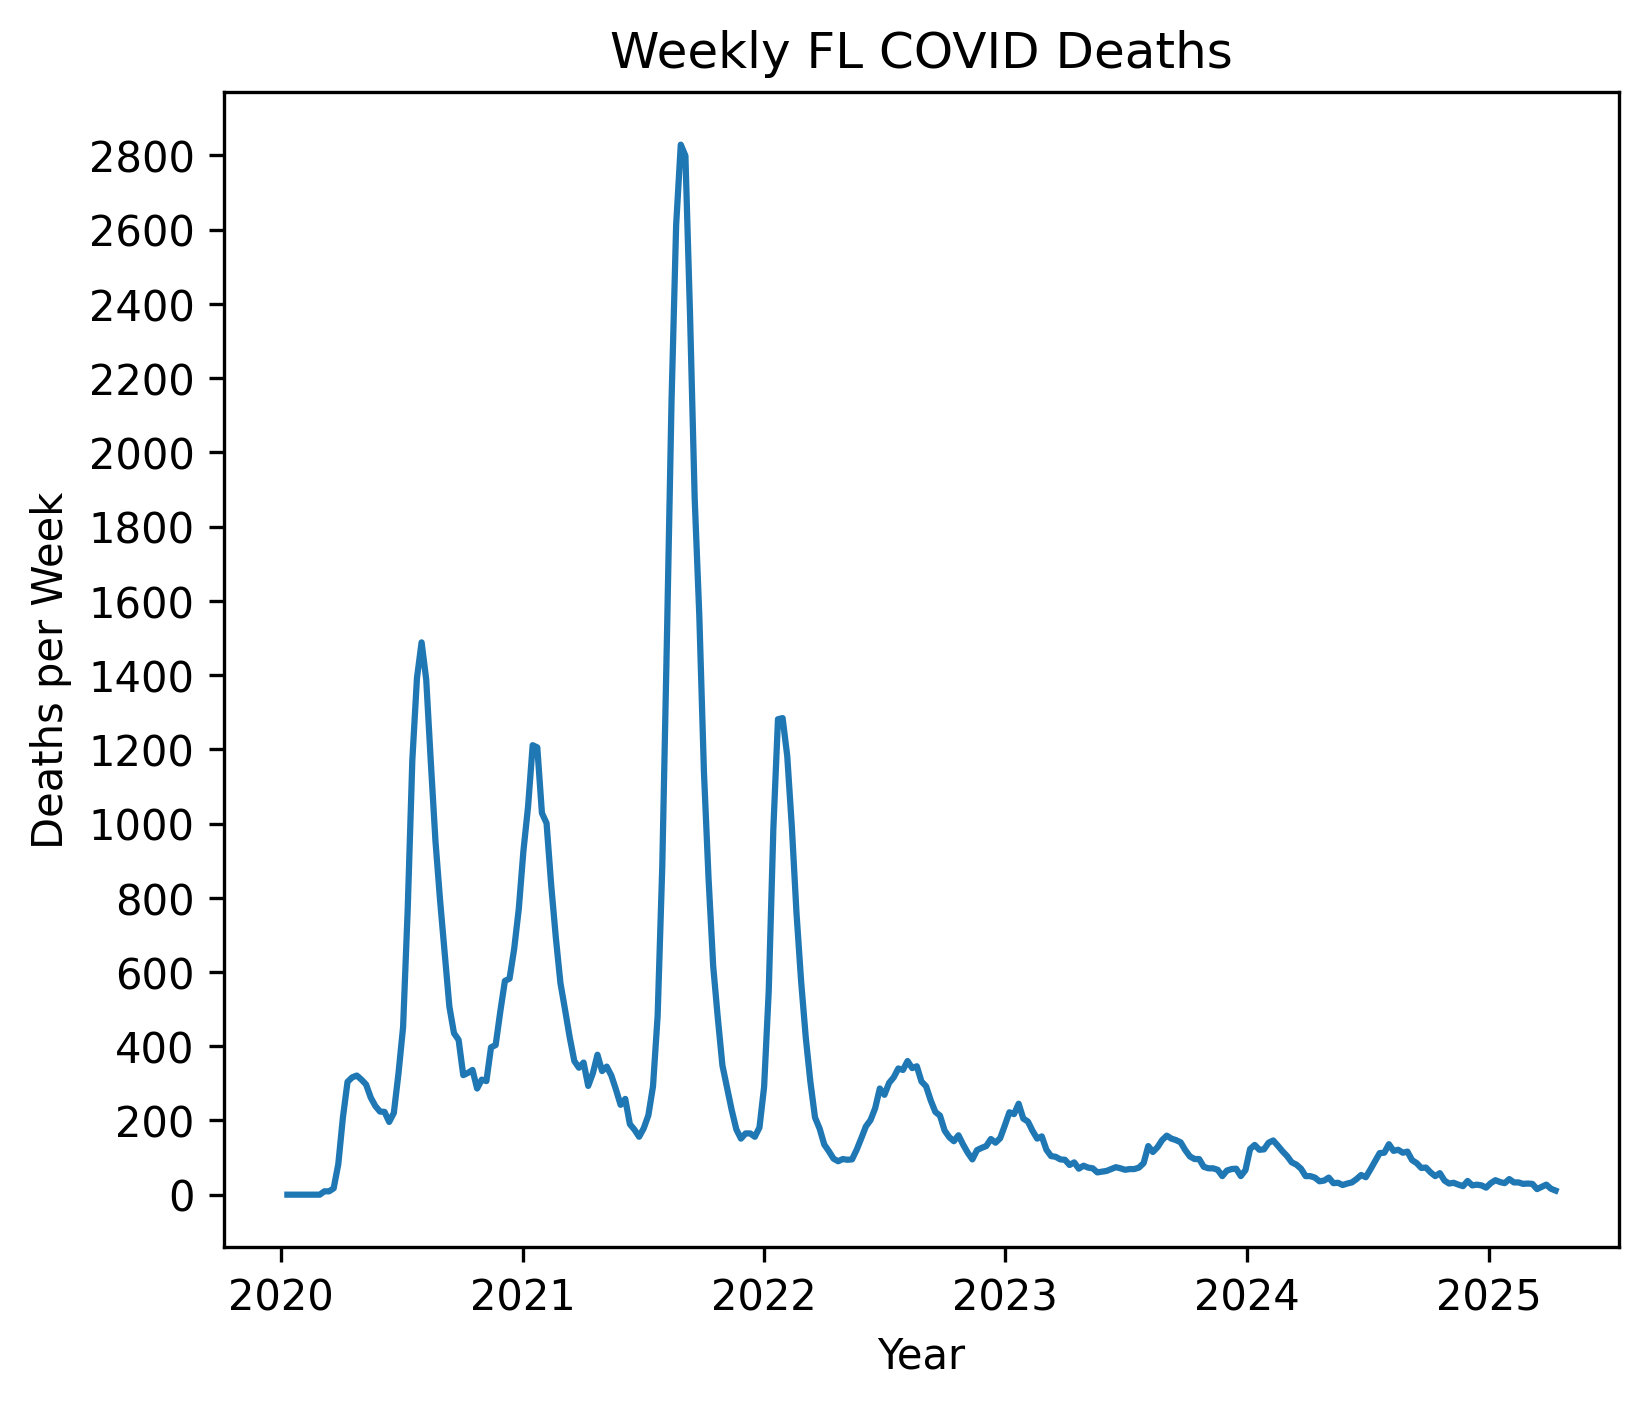

In [247]:
# creating graph and parameters for plotting
plt.figure(figsize=(6,5),dpi=300)
x = florida['Date']
y = florida['Weekly FL Deaths']

# setting labels & values for y ticks
yticks = [0,200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400,2600,2800,3000]
plt.yticks(yticks,labels=yticks)

# setting constant xaxis format to years from matplotlib mdates
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# visualizing
plt.title('Weekly FL COVID Deaths')
plt.xlabel('Year')
plt.ylabel('Deaths per Week')
plt.plot(x,y)
plt.show()

In [255]:
# statistical analysis on florida COVID-19 deaths
florida.describe()

,Date,Weekly FL Deaths
count,275,275.000000
mean,2022-08-27 00:00:00,311.909091
min,2020-01-11 00:00:00,0.000000
25%,2021-05-04 12:00:00,70.000000
50%,2022-08-27 00:00:00,150.000000
75%,2023-12-19 12:00:00,326.500000
max,2025-04-12 00:00:00,2829.000000
std,NaN,451.444691


In [257]:
# reporting & profiling data
!pip install ydata-profiling

  Preparing metadata (setup.py) ... one
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 30.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.2/659.2 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.7/38.7 MB 42.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 37.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 43.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 46.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27129 sha256=7f0dca69ddd893a0a558bd6db0820ace8d29742699b2d58884d4c97bcdae2820
  Stored in directory: /Users/benteixeira/Library/Caches/pip/wheels

In [259]:
from ydata_profiling import ProfileReport as pr

In [266]:
# profiling data and exporting it as a file in html
florida_report = pr(florida,title='FL COVID Death Data',explorative=True)
florida_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 2/2 [00:00<00:00, 2325.65it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [267]:
florida_report.to_file('florida_covid_deaths.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]